In [2]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [3]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]
df.head(10)

,Name,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,"""real_third""",nn,0.778673,0.975567,0.956157,0.935963,0.916417,0.895667,0.872573,0.846073,...,0.911800,0.925760,0.930257,0.935620,0.938457,0.940757,0.945123,0.950653,0.958000,1.0
1,"""second""",nn,0.779667,0.976000,0.956667,0.936333,0.916000,0.895000,0.871333,0.843667,...,0.914667,0.929667,0.933667,0.939333,0.942333,0.945333,0.948333,0.953333,0.960667,1.0
2,"""third""",nn,0.775333,0.974000,0.953000,0.932667,0.911667,0.888333,0.865667,0.838667,...,0.917333,0.931333,0.934667,0.939333,0.942333,0.946000,0.949667,0.955333,0.959000,1.0
3,"""best""",nn,0.777667,0.975333,0.955667,0.934667,0.913667,0.890333,0.865000,0.837000,...,0.920000,0.934667,0.938333,0.942333,0.945000,0.949000,0.952333,0.957000,0.965333,1.0
0,"""real_third""",xgboost,0.784027,0.987640,0.975653,0.963227,0.951520,0.939463,0.925413,0.909857,...,0.870060,0.881990,0.885797,0.890613,0.893577,0.897993,0.903427,0.909957,0.922453,1.0
1,"""second""",xgboost,0.786000,0.985667,0.974000,0.963000,0.950667,0.937000,0.924667,0.910667,...,0.876667,0.890667,0.894667,0.899667,0.903333,0.907667,0.912333,0.919000,0.930667,1.0
2,"""third""",xgboost,0.782667,0.987333,0.976000,0.964000,0.952000,0.940333,0.928333,0.912000,...,0.872000,0.885000,0.889333,0.893667,0.897000,0.901333,0.905333,0.913333,0.923333,1.0
3,"""best""",xgboost,0.785667,0.986333,0.973667,0.962333,0.950667,0.937667,0.923667,0.908000,...,0.876000,0.888333,0.892667,0.899000,0.902333,0.906667,0.911333,0.917000,0.927667,1.0
0,"""real_third""",linear,0.783983,0.950660,0.928543,0.908813,0.886487,0.864067,0.838770,0.809487,...,0.944277,0.959180,0.961923,0.966307,0.968727,0.970973,0.975603,0.978643,0.983413,1.0
1,"""second""",linear,0.784000,0.948667,0.927667,0.906667,0.883333,0.859333,0.834000,0.805000,...,0.950000,0.962667,0.965000,0.969667,0.971667,0.974667,0.977667,0.981667,0.987000,1.0


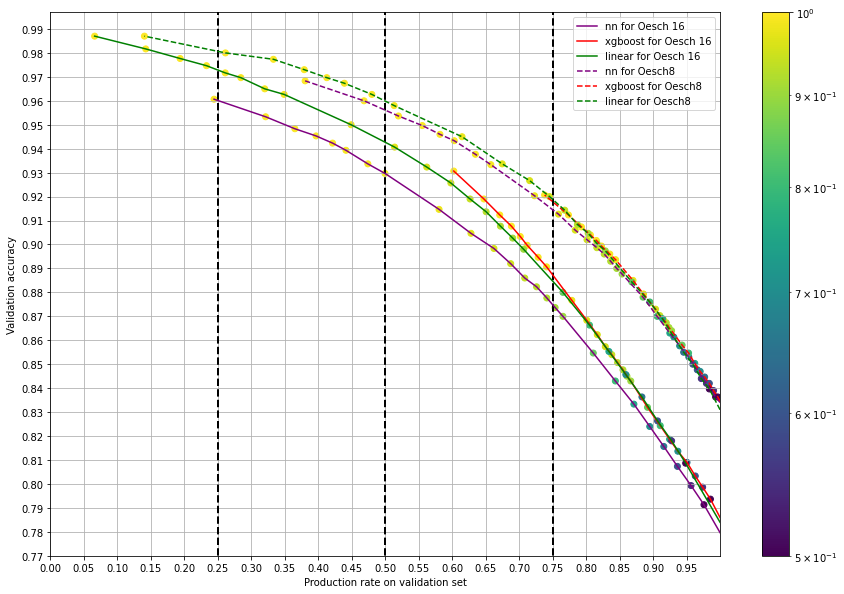

In [38]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model!="nn"] # am anfang second besser, ab 0.75 best besster # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second bestes
#df = df[df.combi_model=="linear"] # am anfang second besser, später best besser

#df = df[df['Name'] == '"best"'] 
df = df[df['Name'] == '"second"'] # das ist wie optimization gefunden hat bestes modell
df = df[df['Name'] != '"third"'] # das fliegt raus weil es nicht in top 3 war laut balanced acc
#df = df[df['Name'] == '"real_third"']

df11 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df22 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df33 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
dfn = pd.concat([df11, df22, df33])
dfn= dfn.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
dfn['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
#df = df[df.combi_model=="linear"] # second minimal bestes

dfn = dfn[dfn['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
dfn = dfn[dfn['Name'] != '"third"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

"""
def replace(x):
    #print(x)
    if x == "best":
        return "Oesch 8"
    if x == "second":
        return "Oesch16"
    else:
        return x


print(df.Name.apply(lambda x: replace(x)))
print(df)

names = df.Name.values"""

df = pd.concat([df, dfn])
names = ["Oesch 16", "Oesch 16", "Oesch 16", "Oesch8", "Oesch8", "Oesch8"]
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
#colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = ["purple", "red", "green", "purple", "red", "green"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()



for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]

lsse = ["-","-","-","--","--","--"]

plt.figure(figsize= (15,10))
for perc, acc, name, combi_mod, linecolor, ls in zip(percentages, accuracies, names, combi_model, colors, lsse):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor, ls = ls, label = f"{combi_mod} for {name}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((np.round(np.min(accuracies)-0.01, decimals = 3) , np.max(accuracies)+0.01))
plt.grid()
plt.yticks(np.arange(np.round(np.min(accuracies)-0.01, decimals = 3), np.max(accuracies)+0.01, step=0.01))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Production rate on validation set")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

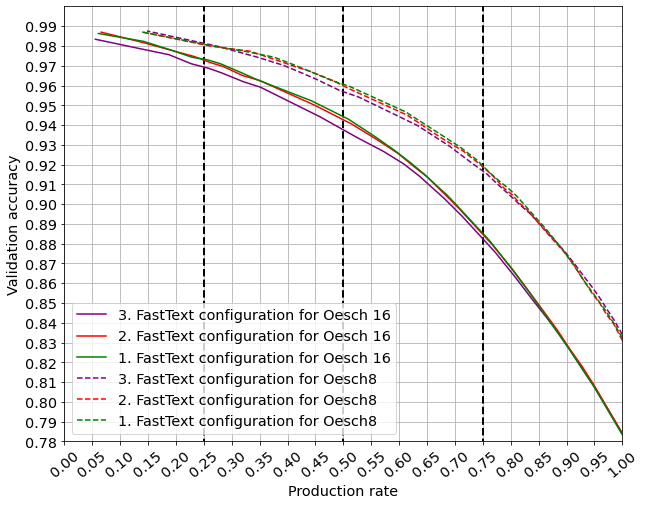

In [107]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model!="nn"] # am anfang second besser, ab 0.75 best besster # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second bestes
df = df[df.combi_model=="linear"] # am anfang second besser, später best besser

#df = df[df['Name'] == '"best"'] 
#df = df[df['Name'] == '"second"'] # das ist wie optimization gefunden hat bestes modell
df = df[df['Name'] != '"third"'] # das fliegt raus weil es nicht in top 3 war laut balanced acc
#df = df[df['Name'] == '"real_third"']

df11 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df22 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df33 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
dfn = pd.concat([df11, df22, df33])
dfn= dfn.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
dfn['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
dfn = dfn[dfn.combi_model=="linear"] # second minimal bestes

#dfn = dfn[dfn['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
dfn = dfn[dfn['Name'] != '"third"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

"""
def replace(x):
    #print(x)
    if x == "best":
        return "Oesch 8"
    if x == "second":
        return "Oesch16"
    else:
        return x


print(df.Name.apply(lambda x: replace(x)))
print(df)

names = df.Name.values"""

df = pd.concat([df, dfn])
#print(df)
#names = df.Names.values()
names = ["Oesch 16", "Oesch 16", "Oesch 16", "Oesch8", "Oesch8", "Oesch8"]
combi_model= ["3. FastText configuration", "2. FastText configuration", "1. FastText configuration", "3. FastText configuration", "2. FastText configuration", "1. FastText configuration"]
#combi_model = df.Name.values
#val_acc= df['combi average.combi validation accuracy'].values
#colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = ["purple", "red", "green", "purple", "red", "green"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()



for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]

lsse = ["-","-","-","--","--","--"]

plt.figure(figsize= (10,8))
for perc, acc, name, combi_mod, linecolor, ls in zip(percentages, accuracies, names, combi_model, colors, lsse):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    #plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor, ls = ls, label = f"{combi_mod} for {name}")
#cbar = plt.colorbar()
#cbar.set_label('confidence cut-off point',fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.78 , 1))
plt.grid()
plt.yticks(np.arange(0.78,1, step=0.01), fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05), fontsize="x-large", rotation=40)
plt.xlabel("Production rate", fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('ohne_linear.png')

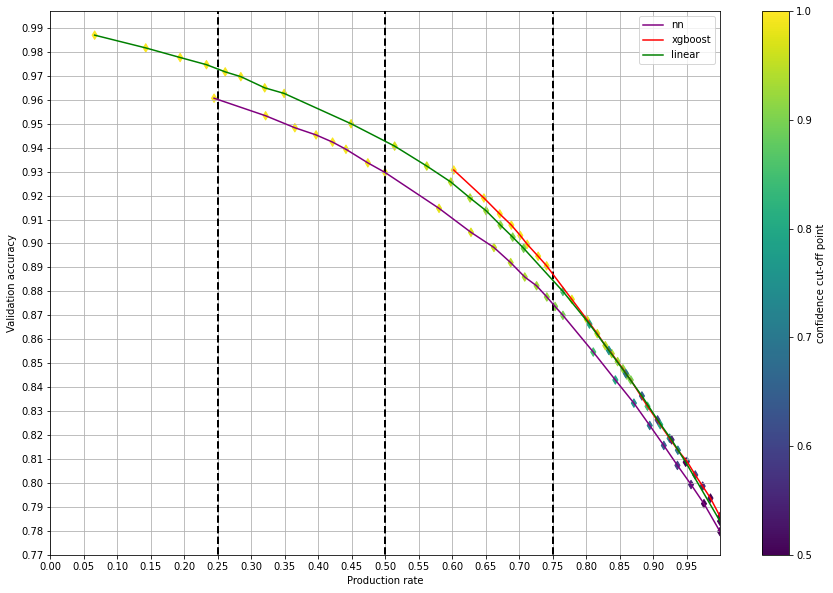

In [51]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (15,10))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor, label = f"{combi_mod}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point')

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((np.round(np.min(accuracies)-0.01, decimals = 3), np.max(accuracies)+0.01))
plt.grid()
plt.yticks(np.arange(np.round(np.min(accuracies)-0.01, decimals = 3), np.max(accuracies)+0.01, step=0.01))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Production rate")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('ohne_16_conf.png')

In [52]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]
df.head(10)

,Name,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,"""real_third""",nn,0.778673,0.975567,0.956157,0.935963,0.916417,0.895667,0.872573,0.846073,...,0.911800,0.925760,0.930257,0.935620,0.938457,0.940757,0.945123,0.950653,0.958000,1.0
1,"""second""",nn,0.779667,0.976000,0.956667,0.936333,0.916000,0.895000,0.871333,0.843667,...,0.914667,0.929667,0.933667,0.939333,0.942333,0.945333,0.948333,0.953333,0.960667,1.0
2,"""third""",nn,0.775333,0.974000,0.953000,0.932667,0.911667,0.888333,0.865667,0.838667,...,0.917333,0.931333,0.934667,0.939333,0.942333,0.946000,0.949667,0.955333,0.959000,1.0
3,"""best""",nn,0.777667,0.975333,0.955667,0.934667,0.913667,0.890333,0.865000,0.837000,...,0.920000,0.934667,0.938333,0.942333,0.945000,0.949000,0.952333,0.957000,0.965333,1.0
0,"""real_third""",xgboost,0.784027,0.987640,0.975653,0.963227,0.951520,0.939463,0.925413,0.909857,...,0.870060,0.881990,0.885797,0.890613,0.893577,0.897993,0.903427,0.909957,0.922453,1.0
1,"""second""",xgboost,0.786000,0.985667,0.974000,0.963000,0.950667,0.937000,0.924667,0.910667,...,0.876667,0.890667,0.894667,0.899667,0.903333,0.907667,0.912333,0.919000,0.930667,1.0
2,"""third""",xgboost,0.782667,0.987333,0.976000,0.964000,0.952000,0.940333,0.928333,0.912000,...,0.872000,0.885000,0.889333,0.893667,0.897000,0.901333,0.905333,0.913333,0.923333,1.0
3,"""best""",xgboost,0.785667,0.986333,0.973667,0.962333,0.950667,0.937667,0.923667,0.908000,...,0.876000,0.888333,0.892667,0.899000,0.902333,0.906667,0.911333,0.917000,0.927667,1.0
0,"""real_third""",linear,0.783983,0.950660,0.928543,0.908813,0.886487,0.864067,0.838770,0.809487,...,0.944277,0.959180,0.961923,0.966307,0.968727,0.970973,0.975603,0.978643,0.983413,1.0
1,"""second""",linear,0.784000,0.948667,0.927667,0.906667,0.883333,0.859333,0.834000,0.805000,...,0.950000,0.962667,0.965000,0.969667,0.971667,0.974667,0.977667,0.981667,0.987000,1.0


In [53]:
df.columns

Index(['Name', 'combi_model',
       'confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.perc

In [56]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

a = df.groupby(["combi_model"], as_index= False)[['confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.percentage labelled @0.96: ',
       'confidence average @0.97.percentage labelled @0.97: ',
       'confidence average @0.98.percentage labelled @0.98: ',
       'confidence average @0.99.percentage labelled @0.99: ',
       'confidence average @0.992.percentage labelled @0.992: ',
       'confidence average @0.994.percentage labelled @0.994: ',
       'confidence average @0.995.percentage labelled @0.995: ',
       'confidence average @0.996.percentage labelled @0.996: ',
       'confidence average @0.997.percentage labelled @0.997: ',
       'confidence average @0.998.percentage labelled @0.998: ',
       'confidence average @0.999.percentage labelled @0.999: ',
       'confidence average @0.5.validation accuracy @0.5: ',
       'confidence average @0.55.validation accuracy @0.55: ',
       'confidence average @0.6.validation accuracy @0.6: ',
       'confidence average @0.65.validation accuracy @0.65: ',
       'confidence average @0.7.validation accuracy @0.7: ',
       'confidence average @0.75.validation accuracy @0.75: ',
       'confidence average @0.8.validation accuracy @0.8: ',
       'confidence average @0.85.validation accuracy @0.85: ',
       'confidence average @0.9.validation accuracy @0.9: ',
       'confidence average @0.91.validation accuracy @0.91: ',
       'confidence average @0.92.validation accuracy @0.92: ',
       'confidence average @0.93.validation accuracy @0.93: ',
       'confidence average @0.94.validation accuracy @0.94: ',
       'confidence average @0.95.validation accuracy @0.95: ',
       'confidence average @0.96.validation accuracy @0.96: ',
       'confidence average @0.97.validation accuracy @0.97: ',
       'confidence average @0.98.validation accuracy @0.98: ',
       'confidence average @0.99.validation accuracy @0.99: ',
       'confidence average @0.992.validation accuracy @0.992: ',
       'confidence average @0.994.validation accuracy @0.994: ',
       'confidence average @0.995.validation accuracy @0.995: ',
       'confidence average @0.996.validation accuracy @0.996: ',
       'confidence average @0.997.validation accuracy @0.997: ',
       'confidence average @0.998.validation accuracy @0.998: ',
       'confidence average @0.999.validation accuracy @0.999: ',
       'confidence average @0.0.percentage labelled @0.0: ']].mean()
a.head()

,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,confidence average @0.85.percentage labelled @0.85:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,linear,0.782912,0.948915,0.927052,0.905953,0.883455,0.860267,0.835109,0.805205,0.766275,...,0.948236,0.960878,0.964231,0.968577,0.970932,0.973327,0.976734,0.980911,0.98502,1.0
1,nn,0.777835,0.975225,0.955373,0.934908,0.914438,0.892333,0.868643,0.841352,0.808840,...,0.915950,0.930357,0.934231,0.939155,0.942031,0.945272,0.948864,0.954080,0.96075,1.0
2,xgboost,0.784590,0.986743,0.974830,0.963140,0.951213,0.938616,0.925520,0.910131,0.891585,...,0.873682,0.886498,0.890616,0.895737,0.899061,0.903415,0.908107,0.914822,0.92603,1.0


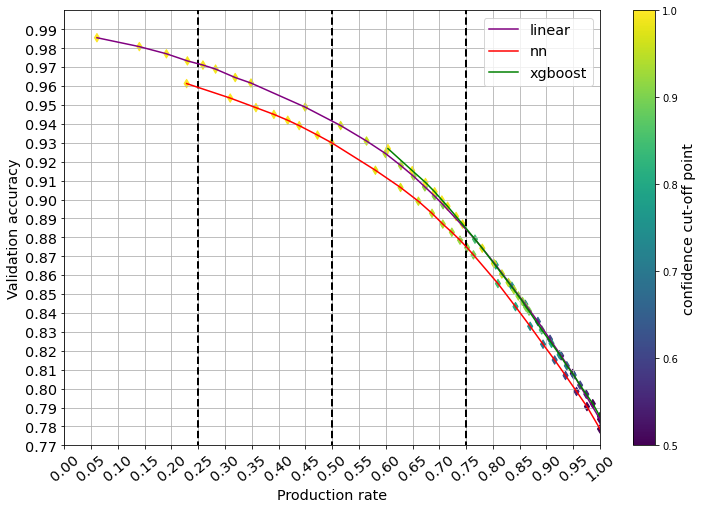

In [74]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
df = df[df['Name'] != '"third"']

df = df.groupby(["combi_model"], as_index= False)[['confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.percentage labelled @0.96: ',
       'confidence average @0.97.percentage labelled @0.97: ',
       'confidence average @0.98.percentage labelled @0.98: ',
       'confidence average @0.99.percentage labelled @0.99: ',
       'confidence average @0.992.percentage labelled @0.992: ',
       'confidence average @0.994.percentage labelled @0.994: ',
       'confidence average @0.995.percentage labelled @0.995: ',
       'confidence average @0.996.percentage labelled @0.996: ',
       'confidence average @0.997.percentage labelled @0.997: ',
       'confidence average @0.998.percentage labelled @0.998: ',
       'confidence average @0.999.percentage labelled @0.999: ',
       'confidence average @0.5.validation accuracy @0.5: ',
       'confidence average @0.55.validation accuracy @0.55: ',
       'confidence average @0.6.validation accuracy @0.6: ',
       'confidence average @0.65.validation accuracy @0.65: ',
       'confidence average @0.7.validation accuracy @0.7: ',
       'confidence average @0.75.validation accuracy @0.75: ',
       'confidence average @0.8.validation accuracy @0.8: ',
       'confidence average @0.85.validation accuracy @0.85: ',
       'confidence average @0.9.validation accuracy @0.9: ',
       'confidence average @0.91.validation accuracy @0.91: ',
       'confidence average @0.92.validation accuracy @0.92: ',
       'confidence average @0.93.validation accuracy @0.93: ',
       'confidence average @0.94.validation accuracy @0.94: ',
       'confidence average @0.95.validation accuracy @0.95: ',
       'confidence average @0.96.validation accuracy @0.96: ',
       'confidence average @0.97.validation accuracy @0.97: ',
       'confidence average @0.98.validation accuracy @0.98: ',
       'confidence average @0.99.validation accuracy @0.99: ',
       'confidence average @0.992.validation accuracy @0.992: ',
       'confidence average @0.994.validation accuracy @0.994: ',
       'confidence average @0.995.validation accuracy @0.995: ',
       'confidence average @0.996.validation accuracy @0.996: ',
       'confidence average @0.997.validation accuracy @0.997: ',
       'confidence average @0.998.validation accuracy @0.998: ',
       'confidence average @0.999.validation accuracy @0.999: ',
       'confidence average @0.0.percentage labelled @0.0: ']].mean()
#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (12,8))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor, label = f"{combi_mod}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point',fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.77, 1.0))
plt.grid()
plt.yticks(np.arange(0.77, 1.0, step=0.01),fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05),fontsize="x-large", rotation=40)
plt.xlabel("Production rate",fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('ohne_16_conf.png')

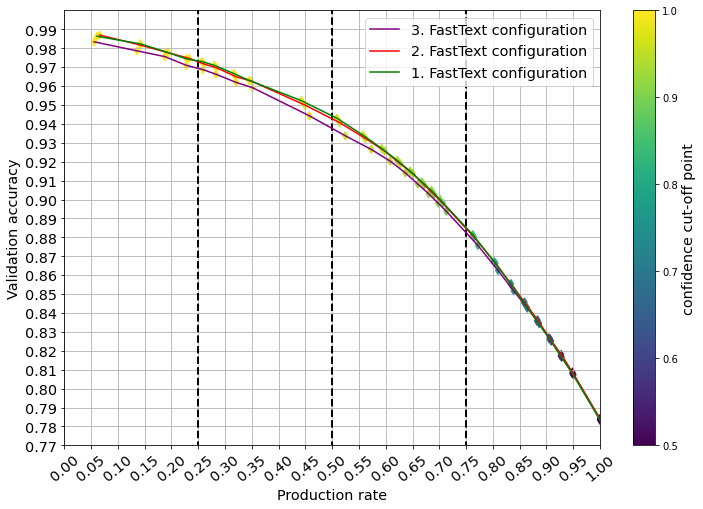

In [83]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
df = df[df['Name'] != '"third"']


#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


#names = df.Name.values
names = ["3. FastText configuration", "2. FastText configuration", "1. FastText configuration"]
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()



for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (12,8))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor, label = f"{name}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point',fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.77, 1.0))
plt.grid()
plt.yticks(np.arange(0.77, 1.0, step=0.01),fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05),fontsize="x-large", rotation=40)
plt.xlabel("Production rate",fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('ohne_16_linear.png')

In [75]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
df = df[df['Name'] != '"third"']

df = df.groupby(["combi_model"], as_index= False)[['confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.percentage labelled @0.96: ',
       'confidence average @0.97.percentage labelled @0.97: ',
       'confidence average @0.98.percentage labelled @0.98: ',
       'confidence average @0.99.percentage labelled @0.99: ',
       'confidence average @0.992.percentage labelled @0.992: ',
       'confidence average @0.994.percentage labelled @0.994: ',
       'confidence average @0.995.percentage labelled @0.995: ',
       'confidence average @0.996.percentage labelled @0.996: ',
       'confidence average @0.997.percentage labelled @0.997: ',
       'confidence average @0.998.percentage labelled @0.998: ',
       'confidence average @0.999.percentage labelled @0.999: ',
       'confidence average @0.5.validation accuracy @0.5: ',
       'confidence average @0.55.validation accuracy @0.55: ',
       'confidence average @0.6.validation accuracy @0.6: ',
       'confidence average @0.65.validation accuracy @0.65: ',
       'confidence average @0.7.validation accuracy @0.7: ',
       'confidence average @0.75.validation accuracy @0.75: ',
       'confidence average @0.8.validation accuracy @0.8: ',
       'confidence average @0.85.validation accuracy @0.85: ',
       'confidence average @0.9.validation accuracy @0.9: ',
       'confidence average @0.91.validation accuracy @0.91: ',
       'confidence average @0.92.validation accuracy @0.92: ',
       'confidence average @0.93.validation accuracy @0.93: ',
       'confidence average @0.94.validation accuracy @0.94: ',
       'confidence average @0.95.validation accuracy @0.95: ',
       'confidence average @0.96.validation accuracy @0.96: ',
       'confidence average @0.97.validation accuracy @0.97: ',
       'confidence average @0.98.validation accuracy @0.98: ',
       'confidence average @0.99.validation accuracy @0.99: ',
       'confidence average @0.992.validation accuracy @0.992: ',
       'confidence average @0.994.validation accuracy @0.994: ',
       'confidence average @0.995.validation accuracy @0.995: ',
       'confidence average @0.996.validation accuracy @0.996: ',
       'confidence average @0.997.validation accuracy @0.997: ',
       'confidence average @0.998.validation accuracy @0.998: ',
       'confidence average @0.999.validation accuracy @0.999: ',
       'confidence average @0.0.percentage labelled @0.0: ']].mean()
#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


d= pd.DataFrame(index= confidences)
for accu,perce, name in zip(accuracies,percentages, combi_model):
    b= pd.DataFrame(accu, index= confidences)
    c= pd.DataFrame(perce, index= confidences)
    d.insert(0, f"{name} accuracies", b)
    d.insert(0, f"{name} percentages", c)
    
    
d.head(50)

,xgboost percentages,xgboost accuracies,nn percentages,nn accuracies,linear percentages,linear accuracies
0.000,1.000000,0.785231,1.000000,0.778669,1.000000,0.783772
0.500,0.986547,0.792026,0.975633,0.790513,0.949220,0.808013
0.550,0.974440,0.797038,0.956163,0.798501,0.927514,0.817352
0.600,0.962853,0.801822,0.935654,0.806937,0.906716,0.826069
0.650,0.950951,0.807169,0.915361,0.815122,0.884051,0.835498
0.700,0.938043,0.812087,0.893667,0.823466,0.860578,0.844559
0.750,0.924582,0.817914,0.869636,0.832958,0.835368,0.854130
0.800,0.909508,0.823933,0.842247,0.843359,0.805384,0.865406
0.850,0.891224,0.831050,0.809453,0.855577,0.766589,0.879041
0.900,0.867600,0.840970,0.763727,0.870747,0.707052,0.897263


In [101]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
df = df[df['Name'] != '"third"']


#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


#names = df.Name.values
names= ["3. FastText configuration", "2. FastText configuration", "1. FastText configuration"]
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


d= pd.DataFrame(index= confidences)
for accu,perce, name in zip(accuracies,percentages, names):
    b= pd.DataFrame(accu, index= confidences)
    c= pd.DataFrame(perce, index= confidences)
    d.insert(0, f"{name} accuracies", b)
    d.insert(0, f"{name} percentages", c)
    
    
d.head(50)

,1. FastText configuration percentages,1. FastText configuration accuracies,2. FastText configuration percentages,2. FastText configuration accuracies,3. FastText configuration percentages,3. FastText configuration accuracies
0.000,1.000000,0.783333,1.000000,0.784000,1.000000,0.783983
0.500,0.948333,0.808000,0.948667,0.808667,0.950660,0.807373
0.550,0.926333,0.817333,0.927667,0.818000,0.928543,0.816723
0.600,0.904667,0.826667,0.906667,0.826333,0.908813,0.825207
0.650,0.882333,0.835667,0.883333,0.836333,0.886487,0.834493
0.700,0.858333,0.845333,0.859333,0.845667,0.864067,0.842677
0.750,0.833333,0.855333,0.834000,0.855333,0.838770,0.851723
0.800,0.801667,0.867333,0.805000,0.866333,0.809487,0.862550
0.850,0.762667,0.881333,0.765333,0.880000,0.771767,0.875790
0.900,0.701333,0.900000,0.706667,0.898000,0.713157,0.893790


In [79]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
df = df[df['Name'] != '"third"']


#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = 0.0
        else:
            max = accuracies[row][value]


for min in [0, 0.25,0.5,0.75,0.9]:
    result = []
    for i in range(len(accuracies)):
        perce = np.flip(percentages[i])
        #print(perce)
        accu = np.flip(accuracies[i])
        #print(accu)        
        z = np.interp(np.arange(min,1,step=0.01), perce, accu, left= 0.0).mean()
        #print(z)
        result.append(z)
    print(min)
    print(result)
    print(names)

0
[0.8630985012792723, 0.8559775561968676, 0.8562337555413858]
['"real_third"' '"second"' '"best"']
0.25
[0.9031981502770109, 0.9059723436668414, 0.9063266332305615]
['"real_third"' '"second"' '"best"']
0.5
[0.8769896286855083, 0.8792722728590278, 0.8793527885165651]
['"real_third"' '"second"' '"best"']
0.75
[0.8387536101498838, 0.8399309907110473, 0.8394456057996829]
['"real_third"' '"second"' '"best"']
0.9
[0.8092944577870098, 0.8096802789802788, 0.8088570734117966]
['"real_third"' '"second"' '"best"']
